## Imports 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io as aio
import astropy.units as u

import lenstools as lt

%matplotlib inline

/usr/local/lib/python3.7/site-packages/lenstools/utils/mpi.py:15: UserWarning: Could not import mpi4py! (if you set sys.modules['mpi4py']=None please disregard this message)
  warnings.warn(wmsg)
/usr/local/lib/python3.7/site-packages/lenstools/statistics/ensemble.py:943: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  class Panel(pd.Panel):


## Header 

In [2]:
with aio.fits.open("hlsp_frontier_model_abell2744_cats_v4.1_kappa.fits") as hdu:
    head = hdu[0].header

head

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2000 / length of data axis 1                          
NAXIS2  =                 2000 / length of data axis 2                          
EXTEND  =                    F / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                   0. / BZERO                                          
BSCALE  =                   1. / BSCALE                                         
EQUINOX =               2000.0 / EQUINOX                                        
CTYPE1  = 'RA---TAN'           / CTYPE1                                         
CRVAL1  =             3.5862

## Read one kappa map 

In [3]:
def loadConvergenceMap(fname):
    with aio.fits.open(fname) as hdu:
        angle = 0.3*hdu[0].header["NAXIS1"]*u.arcsec
        kappa = hdu[0].data
    return angle,kappa

In [4]:
conv = lt.image.convergence.ConvergenceMap.load("hlsp_frontier_model_abell2744_cats_v4.1_kappa.fits",format=loadConvergenceMap)

In [5]:
conv.info

Pixels on a side: 2000
Pixel size: 0.3 arcsec
Total angular size: 600.0 arcsec
lmin=2.2e+03 ; lmax=3.1e+06


## Visualize log(kappa) 

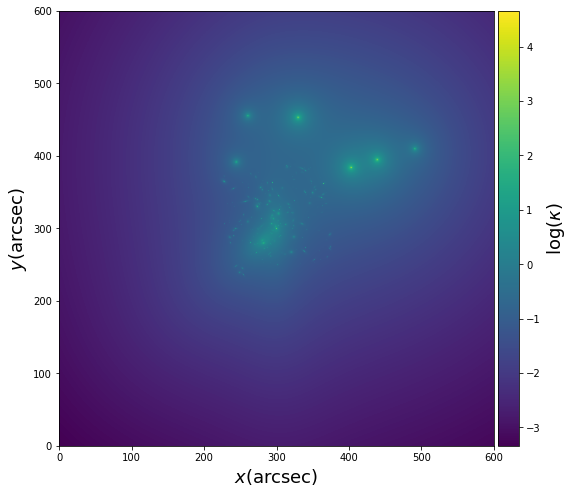

In [6]:
fig,ax = plt.subplots(figsize=(12,8))
lt.image.convergence.ConvergenceMap(np.log(conv.data),angle=conv.side_angle).visualize(colorbar=True,cbar_label=r"$\log(\kappa)$",fig=fig,ax=ax)

## 2D angular power spectrum 

In [7]:
ell_bins = np.logspace(3.5,5.5,50)
ell,Pell = conv.powerSpectrum(ell_bins)

Text(0,0.5,'$\\ell(\\ell+1)P_\\ell/2\\pi$')

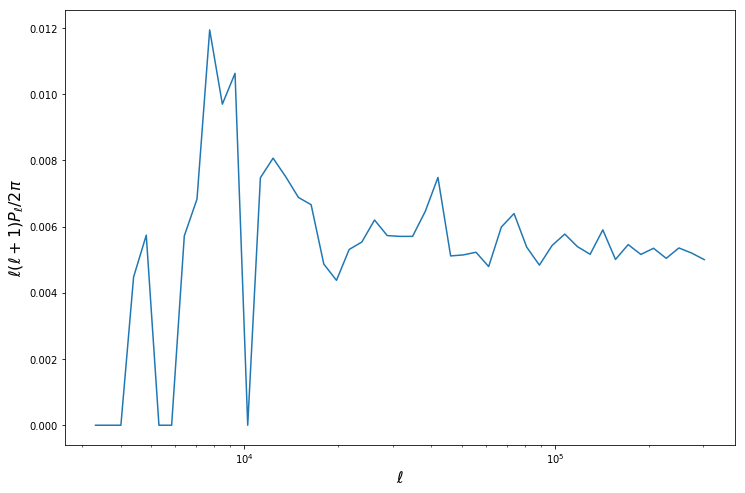

In [8]:
fig,ax = plt.subplots(figsize=(12,8))

ax.plot(ell,ell*(ell+1)*Pell/(2*np.pi))
ax.set_xscale("log")

ax.set_xlabel(r"$\ell$",fontsize=16)
ax.set_ylabel(r"$\ell(\ell+1)P_\ell/2\pi$",fontsize=16)